In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.integrate import quad

In [58]:
def get_adj_profit(rp):
    # demand drop ratio
    ry = np.power(1 + np.exp(6 - np.divide(rp, 10)), -1) - 0.0025

    # mean
    mu_adj = mu / (1 + ry)

    # sigma
    sigma_adj = sigma / (1 + ry)

    # target service level
    level_ajd = ((1 + rp) * p - (1 + rc) * c) / ((1 + rp) * p)

    # optimal order quantity after price increase
    qstar_adj = norm.ppf(level_ajd, mu_adj, sigma_adj)

    return (p * (1 + rp) - c * (1 + rc)) * qstar_adj \
        - p * (1 + rp) * quad(lambda y: norm.cdf(y, loc=mu_adj, scale=sigma_adj), -np.inf, qstar_adj)[0]

In [59]:
p = 10  # price
c = 5  # cost
mu = 100  # mean of the distribution of demand
rc = 0.25  # increase in cost
sigma = 2  # standard deviation of the distribution of demand
level = (p - c) / p  # target service level
qstar = norm.ppf(level, mu, sigma)  # optimal order quantity before price increase
expected_profit = (p - c) * qstar - p * quad(lambda y: norm.cdf(y, loc=mu, scale=sigma), -np.inf, qstar)[0]


def calculate_profit_difference(rp):
    return get_adj_profit(rp) - expected_profit


# solve the equation for finding optimal price increase
optimal_price_increase = fsolve(calculate_profit_difference, [1])[0]

Optimal price increase  0.12592078521798775
Expected profit  492.0211543919713


In [0]:
print("Optimal price increase ", optimal_price_increase)
print("Expected profit ", expected_profit)

Text(0, 0.5, 'Expected profit')

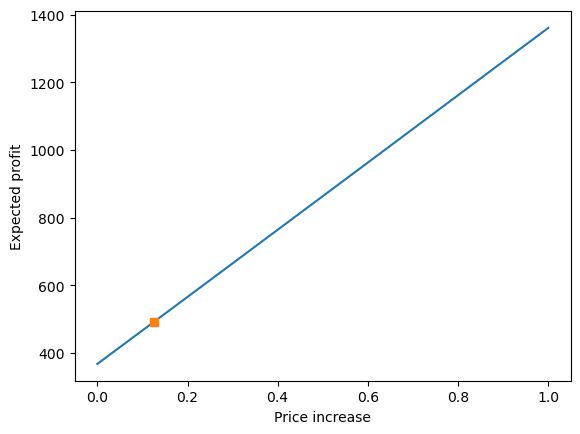

In [60]:
price_increase = np.linspace(0, 1, 1000)

expected_profit_adj = []

for i in price_increase:
    expected_profit_adj.append(get_adj_profit(i))

plt.plot(price_increase, expected_profit_adj)
plt.plot(optimal_price_increase, expected_profit, "s")
plt.xlabel("Price increase")
plt.ylabel("Expected profit")
plt.title("Expected profit with regards to price increase ratio")